In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#读取数据
# HR = pd.read_csv("../input/human_one/HR_comma_sep.csv")
HR = pd.read_csv("./HR_comma_sep.csv")

# 1.数据探索

In [3]:
#查看数据构成
HR.shape


(14999, 10)

In [4]:
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# 查看空值
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


字段说明：

| Column 1 | Column 2 | Column 3 |
| -------- | -------- | -------- |
|satisfaction_level     |  float64  | 满意度      
|last_evaluation        |  float64	| 上一次满意度
|number_project         |    int64	| 项目数
|average_montly_hours   |    int64	| 每月加班平均时间
|time_spend_company     |    int64	| 花在公司的时间	
|Work_accident          |    int64	| 他们是否发生过工伤事故
|left                   |    int64  | 员工是否已经离开
|promotion_last_5years  |    int64  | 在过去的5年里他们是否升职了？
|sales                  |   object  | 所属部门（专栏销售）
|salary                 |   object  | 工资是否可以达到预期












In [6]:
# 查看数值型数据的情况，是否有异常值
HR.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


+ 从整体满意度上看，本次全体员工有不同程度满意度下降的情况
+ 每月加班时间（average_montly_hours） 最大值到310，似乎是个异常值



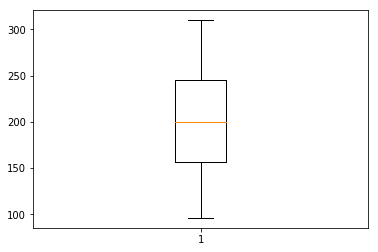

In [7]:
# 做个箱线图看下加班时间是否是异常值
plt.boxplot(HR['average_montly_hours'].values)
plt.show()

+ 300小时竟然不在异常值范围内！神奇！ 大神一样的存在！ --》 可能这是导致整体满意度下降的原因？ 加班严重

In [8]:
# 查看各指标的相关性（协方差）
HR.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


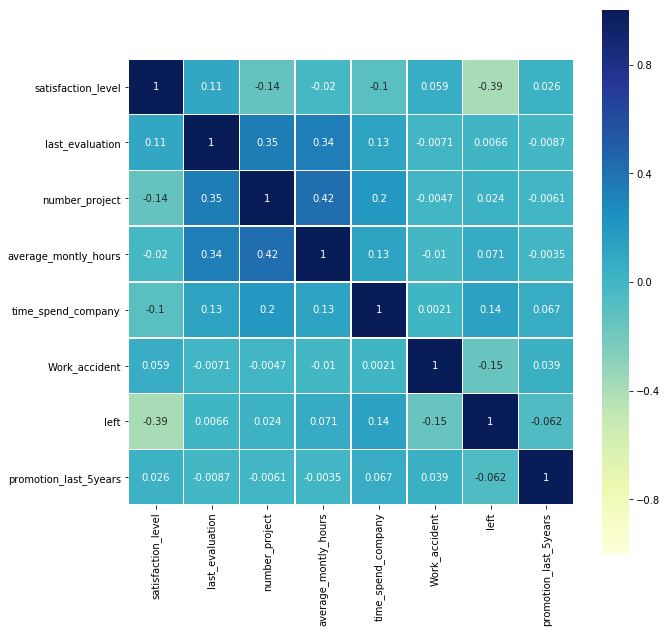

In [9]:
corr = HR.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=1,vmin=-1,square=True,annot=True,linewidths=.5,cmap="YlGnBu")
plt.show()

+ 可能的因果关系：项目数增加 --》加班时间增加 --》满意度下降 --》 离职       相关性超过35%

In [10]:
HR['Current_Status'] = HR['left'].apply(lambda x: 'Stay' if x == 0 else 'Leave')
HR.groupby(['sales','salary','Current_Status']).size()

sales        salary  Current_Status
IT           high    Leave                4
                     Stay                79
             low     Leave              172
                     Stay               437
             medium  Leave               97
                     Stay               438
RandD        high    Leave                4
                     Stay                47
             low     Leave               55
                     Stay               309
             medium  Leave               62
                     Stay               310
accounting   high    Leave                5
                     Stay                69
             low     Leave               99
                     Stay               259
             medium  Leave              100
                     Stay               235
hr           high    Leave                6
                     Stay                39
             low     Leave               92
                     Stay               

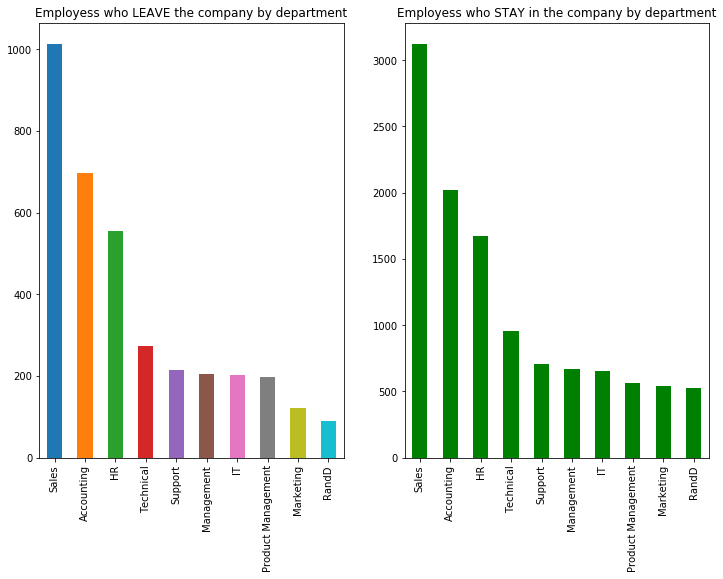

In [11]:
leave = HR[(HR['left'] == 1)]
stay = HR[(HR['left']==0)]
dept_name = HR['sales'].unique()
name=['Sales','Accounting','HR','Technical','Support','Management','IT','Product Management','Marketing','RandD']
index = range(10)

plt.figure(1,figsize=(12,8))

plt.subplot(1,2,1)
leave['sales'].value_counts().plot(kind='bar')
plt.title('Employess who LEAVE the company by department')
plt.xticks(index,name)


plt.subplot(1,2,2)
stay['sales'].value_counts().plot(kind='bar',color='green')
plt.title('Employess who STAY in the company by department')
plt.xticks(index,name)
plt.show()

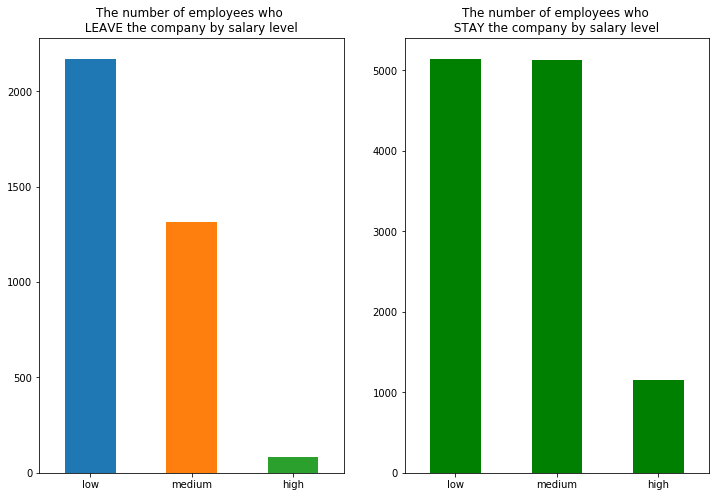

In [12]:
L_salary_level_count = leave['salary'].value_counts()
S_salary_level_count = stay['salary'].value_counts()

plt.figure(1,figsize=(12,8))
plt.subplot(1,2,1)
L_salary_level_count.plot(kind='bar',rot=0)
plt.title('The number of employees who \n LEAVE the company by salary level ')

plt.subplot(1,2,2)
S_salary_level_count.plot(kind='bar',rot=0,color='green')
plt.title('The number of employees who \n STAY the company by salary level ')
plt.show()

In [13]:
def plot_dept_leave_salary(department):
    dept_leave = leave[leave['sales'] ==department]
    count = dept_leave['salary'].value_counts()
    index = [1,2,3]
#     color = ['red','blue','green']
    plt.bar(index,count,width=0.5)
    plt.xticks(index,['Low','Medium','High'])
    
def plot_dept_stay_salary(department):
    dept_stay = stay[stay['sales'] ==department]
    count = dept_stay['salary'].value_counts()
    index = [1,2,3]
    color = ['red','blue','green']
    plt.bar(index,count,width=0.5,color='green')
    plt.xticks(index,['Low','Medium','High'])

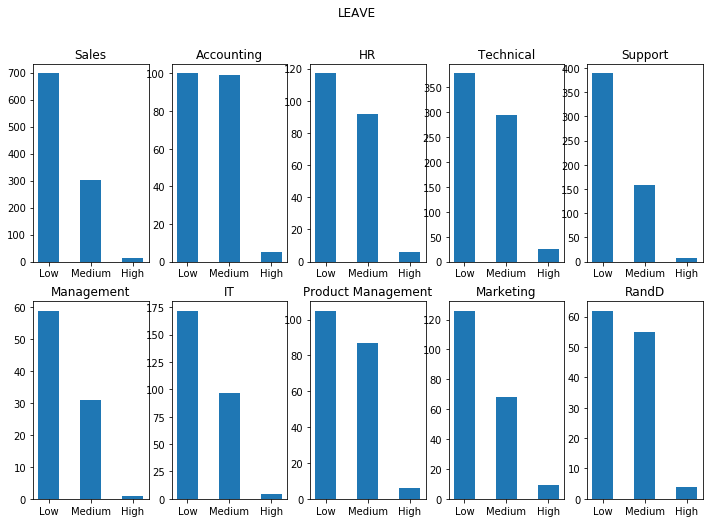

In [14]:
plt.figure(1,figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plot_dept_leave_salary(dept_name[i])
    plt.title(name[i])
plt.suptitle('LEAVE')
plt.show()

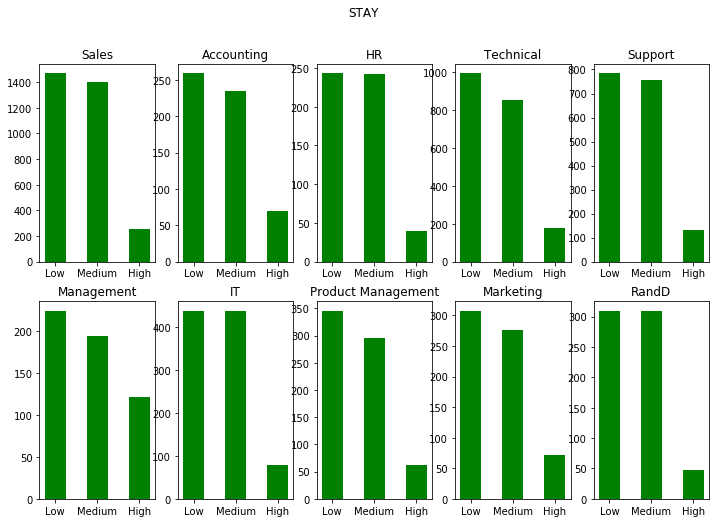

In [15]:
plt.figure(1,figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plot_dept_stay_salary(dept_name[i])
    plt.title(name[i])
plt.suptitle('STAY')
plt.show()

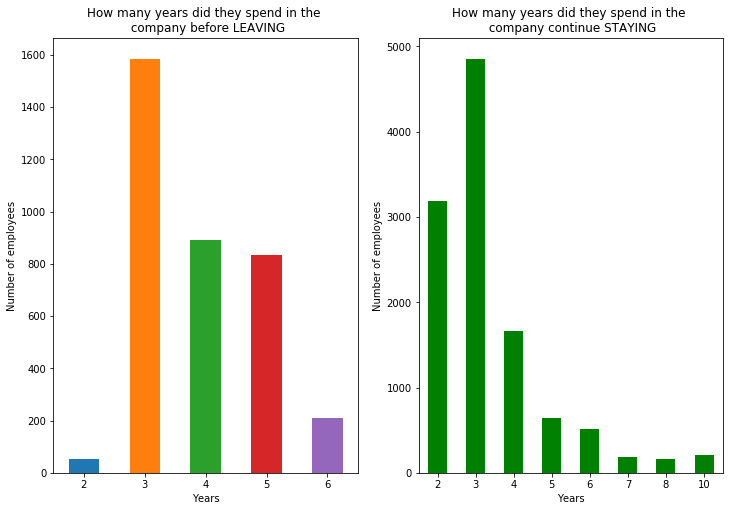

In [16]:
leave_time_spend_count = leave['time_spend_company'].value_counts().sort_index()
stay_time_spend_count = stay['time_spend_company'].value_counts().sort_index()

plt.figure(1,figsize=(12,8))
plt.subplot(1,2,1)
leave_time_spend_count.plot(kind='bar',rot=0)
plt.title('How many years did they spend in the \n company before LEAVING')
plt.xlabel('Years')
plt.ylabel('Number of employees')

plt.subplot(1,2,2)
stay_time_spend_count.plot(kind='bar',rot=0,color='green')
plt.title('How many years did they spend in the \n company continue STAYING')
plt.xlabel('Years')
plt.ylabel('Number of employees')
plt.show()

In [17]:
def plot_dept_leave_years(department):
    year_leave = leave[leave['sales'] ==department]
    count = year_leave['time_spend_company'].value_counts().sort_index()
    index = range(0,len(count))
    check = year_leave['time_spend_company'].unique()
    plt.bar(index,count,width=0.5)
    plt.xticks(index,sorted(check))

def plot_dept_stay_years(department):
    year_stay = stay[stay['sales'] ==department]
    count = year_stay['time_spend_company'].value_counts().sort_index()
    index = range(0,len(count))
    check = year_stay['time_spend_company'].unique()
    plt.bar(index,count,width=0.5,color='green')
    plt.xticks(index,sorted(check))

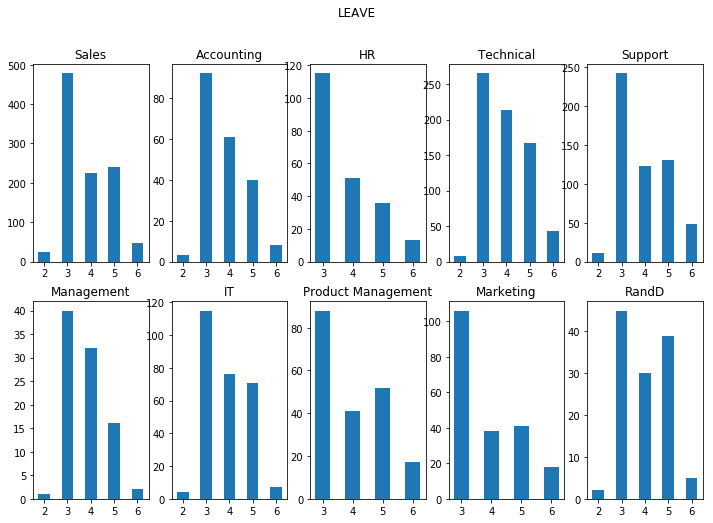

In [18]:
plt.figure(1,figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plot_dept_leave_years(dept_name[i])
    plt.title(name[i])
plt.suptitle('LEAVE')
plt.show()

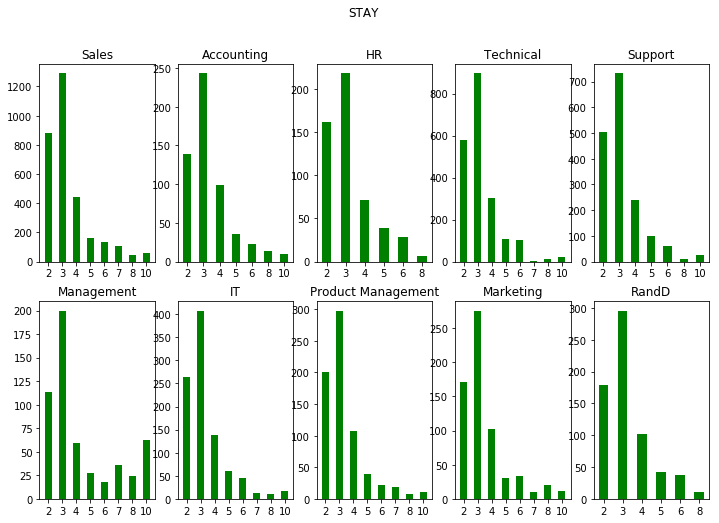

In [19]:
plt.figure(1,figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plot_dept_stay_years(dept_name[i])
    plt.title(name[i])
plt.suptitle('STAY')
plt.show()

# 2.Prediction Analysis

In [20]:
del HR['sales']
del HR['salary']
del HR['Current_Status']

In [21]:
from sklearn.model_selection import train_test_split
label = HR.pop('left')
HR_train,HR_test,label_train,label_test = train_test_split(HR, label, test_size = 0.2, random_state = 42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [23]:
Training_score = []
Testing_score = []
Model = []
Classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()]
def run_classifiers(HR_train,label_train,HR_test,label_test):
    for classifier in Classifiers:
        Model.append(classifier.__class__.__name__)
        classifier.fit(HR_train,label_train)
        Training_score.append(classifier.score(HR_train,label_train))
        Testing_score.append(classifier.score(HR_test,label_test))
        from sklearn.metrics import classification_report as cr
        print("{} : trainning classification report".format(classifier.__class__.__name__))
        print(cr(label_train,classifier.predict(HR_train),digits=4))
        print("{} : testing classification report".format(classifier.__class__.__name__))
        print(cr(label_test,classifier.predict(HR_test),digits=4))

    for i in range(len(Model)):
        print ( "The {:<25} has a training score of {:^10.4f} and testing score of {:^10.4}".format(Model[i],Training_score[i],Testing_score[i]))

In [24]:
run_classifiers(HR_train,label_train,HR_test,label_test)

LogisticRegression : trainning classification report
             precision    recall  f1-score   support

          0     0.7996    0.9281    0.8590      9134
          1     0.5297    0.2583    0.3473      2865

avg / total     0.7351    0.7681    0.7368     11999

LogisticRegression : testing classification report
             precision    recall  f1-score   support

          0     0.7947    0.9198    0.8527      2294
          1     0.4667    0.2280    0.3064       706

avg / total     0.7175    0.7570    0.7241      3000

KNeighborsClassifier : trainning classification report
             precision    recall  f1-score   support

          0     0.9849    0.9681    0.9764      9134
          1     0.9036    0.9525    0.9274      2865

avg / total     0.9655    0.9644    0.9647     11999

KNeighborsClassifier : testing classification report
             precision    recall  f1-score   support

          0     0.9725    0.9542    0.9633      2294
          1     0.8598    0.9122    

## 使用神经网络

In [25]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [26]:
#构建神经网络
mdl = Sequential()
#构建输入层
mdl.add(Dense(50,input_dim=HR.shape[1]))
mdl.add(Activation("sigmoid"))
#构建隐藏层
mdl.add(Dense(2))
mdl.add(Activation("softmax"))
#lr == 学习率
sgd = SGD(lr=0.03)

#编译过程
mdl.compile(loss="mean_squared_error",optimizer="adam")
# label标签需要是one-hot形式的
mdl.fit(HR_train,np.array([[0,1] if i==1 else [1,0] for i in label_train]),epochs=5000,batch_size=11999)
from sklearn.metrics import classification_report as cr
print("{} : trainning classification report".format(mdl.__class__.__name__))
print(cr(label_train,mdl.predict_classes(HR_train),digits=4))
print("{} : testing classification report".format(mdl.__class__.__name__))
print(cr(label_test,mdl.predict_classes(HR_test),digits=4))

Epoch 1/5000
11999/11999 [==============================] - 0s 16us/step - loss: 0.5322
Epoch 2/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.5234
Epoch 3/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.5109
Epoch 4/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.4980
Epoch 5/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.4844
Epoch 6/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.4703
Epoch 7/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.4555
Epoch 8/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.4401
Epoch 9/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.4242
Epoch 10/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.4077
Epoch 11/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.3908
Epoch 12/5000
11999/11999 [=============

Epoch 95/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1804
Epoch 96/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1804
Epoch 97/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1804
Epoch 98/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1803
Epoch 99/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1803
Epoch 100/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1803
Epoch 101/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1802
Epoch 102/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1802
Epoch 103/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1801
Epoch 104/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1800
Epoch 105/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1799
Epoch 106/5000
11999/11999

11999/11999 [==============================] - 0s 1us/step - loss: 0.1754
Epoch 188/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1753
Epoch 189/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1753
Epoch 190/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1752
Epoch 191/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1751
Epoch 192/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1751
Epoch 193/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1750
Epoch 194/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1749
Epoch 195/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1749
Epoch 196/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1748
Epoch 197/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1748
Epoch 198/5000
11999/11999 [========

Epoch 280/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1679
Epoch 281/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1678
Epoch 282/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1677
Epoch 283/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1676
Epoch 284/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1675
Epoch 285/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1674
Epoch 286/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1673
Epoch 287/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1671
Epoch 288/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1671
Epoch 289/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1670
Epoch 290/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1669
Epoch 291/5000
11999/

11999/11999 [==============================] - 0s 1us/step - loss: 0.1581
Epoch 373/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1580
Epoch 374/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1579
Epoch 375/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1578
Epoch 376/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1577
Epoch 377/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1576
Epoch 378/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1575
Epoch 379/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1573
Epoch 380/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1572
Epoch 381/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1571
Epoch 382/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1570
Epoch 383/5000
11999/11999 [========

Epoch 465/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1479
Epoch 466/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1478
Epoch 467/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1477
Epoch 468/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1476
Epoch 469/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1475
Epoch 470/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1474
Epoch 471/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1473
Epoch 472/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1472
Epoch 473/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1471
Epoch 474/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1470
Epoch 475/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1469
Epoch 476/5000
11999/

11999/11999 [==============================] - 0s 1us/step - loss: 0.1364
Epoch 558/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1363
Epoch 559/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1361
Epoch 560/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1360
Epoch 561/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1358
Epoch 562/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1357
Epoch 563/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1356
Epoch 564/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1354
Epoch 565/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1353
Epoch 566/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1352
Epoch 567/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1350
Epoch 568/5000
11999/11999 [========

Epoch 650/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1237
Epoch 651/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1236
Epoch 652/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1234
Epoch 653/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1233
Epoch 654/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1232
Epoch 655/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1231
Epoch 656/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1229
Epoch 657/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1228
Epoch 658/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1227
Epoch 659/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1225
Epoch 660/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1224
Epoch 661/5000
11999/

11999/11999 [==============================] - 0s 1us/step - loss: 0.1129
Epoch 743/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1128
Epoch 744/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1127
Epoch 745/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1126
Epoch 746/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1125
Epoch 747/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1124
Epoch 748/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1123
Epoch 749/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1122
Epoch 750/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1121
Epoch 751/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1120
Epoch 752/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1119
Epoch 753/5000
11999/11999 [========

Epoch 835/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1046
Epoch 836/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1045
Epoch 837/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1044
Epoch 838/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1044
Epoch 839/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1043
Epoch 840/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1042
Epoch 841/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1041
Epoch 842/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1041
Epoch 843/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1040
Epoch 844/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.1039
Epoch 845/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.1039
Epoch 846/5000
11999/

11999/11999 [==============================] - 0s 1us/step - loss: 0.0985
Epoch 928/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0985
Epoch 929/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0984
Epoch 930/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0984
Epoch 931/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0983
Epoch 932/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0983
Epoch 933/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0982
Epoch 934/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0982
Epoch 935/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0981
Epoch 936/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0980
Epoch 937/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0980
Epoch 938/5000
11999/11999 [========

11999/11999 [==============================] - 0s 1us/step - loss: 0.0939
Epoch 1020/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0939
Epoch 1021/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0938
Epoch 1022/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0938
Epoch 1023/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0938
Epoch 1024/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0937
Epoch 1025/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0937
Epoch 1026/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0936
Epoch 1027/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0936
Epoch 1028/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0935
Epoch 1029/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0935
Epoch 1030/5000
11999/1199

Epoch 1111/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0902
Epoch 1112/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0902
Epoch 1113/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0902
Epoch 1114/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0901
Epoch 1115/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0901
Epoch 1116/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0901
Epoch 1117/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0900
Epoch 1118/5000
11999/11999 [==============================] - 0s 3us/step - loss: 0.0900
Epoch 1119/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0900
Epoch 1120/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0899
Epoch 1121/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0899
Epoch 1122

11999/11999 [==============================] - 0s 1us/step - loss: 0.0872
Epoch 1203/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0872
Epoch 1204/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0872
Epoch 1205/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0872
Epoch 1206/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0872
Epoch 1207/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0871
Epoch 1208/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0871
Epoch 1209/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0870
Epoch 1210/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0870
Epoch 1211/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0869
Epoch 1212/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0869
Epoch 1213/5000
11999/1199

Epoch 1294/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0845
Epoch 1295/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0845
Epoch 1296/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0844
Epoch 1297/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0844
Epoch 1298/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0844
Epoch 1299/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0843
Epoch 1300/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0843
Epoch 1301/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0843
Epoch 1302/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0843
Epoch 1303/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0842
Epoch 1304/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0842
Epoch 1305

11999/11999 [==============================] - 0s 2us/step - loss: 0.0821
Epoch 1386/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0820
Epoch 1387/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0820
Epoch 1388/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0820
Epoch 1389/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0820
Epoch 1390/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0819
Epoch 1391/5000
11999/11999 [==============================] - 0s 3us/step - loss: 0.0819
Epoch 1392/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0819
Epoch 1393/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0818
Epoch 1394/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0818
Epoch 1395/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0818
Epoch 1396/5000
11999/1199

Epoch 1477/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0797
Epoch 1478/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0797
Epoch 1479/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0797
Epoch 1480/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0797
Epoch 1481/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0796
Epoch 1482/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0796
Epoch 1483/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0796
Epoch 1484/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0796
Epoch 1485/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0795
Epoch 1486/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0795
Epoch 1487/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0795
Epoch 1488

11999/11999 [==============================] - 0s 1us/step - loss: 0.0776
Epoch 1569/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0776
Epoch 1570/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0776
Epoch 1571/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0775
Epoch 1572/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0775
Epoch 1573/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0774
Epoch 1574/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0774
Epoch 1575/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0774
Epoch 1576/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0774
Epoch 1577/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0774
Epoch 1578/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0773
Epoch 1579/5000
11999/1199

Epoch 1660/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0755
Epoch 1661/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0754
Epoch 1662/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0754
Epoch 1663/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0754
Epoch 1664/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0754
Epoch 1665/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0753
Epoch 1666/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0753
Epoch 1667/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0753
Epoch 1668/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0753
Epoch 1669/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0753
Epoch 1670/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0752
Epoch 1671

11999/11999 [==============================] - 0s 1us/step - loss: 0.0734
Epoch 1752/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0734
Epoch 1753/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0734
Epoch 1754/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0734
Epoch 1755/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0733
Epoch 1756/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0733
Epoch 1757/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0733
Epoch 1758/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0733
Epoch 1759/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0733
Epoch 1760/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0732
Epoch 1761/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0732
Epoch 1762/5000
11999/1199

Epoch 1843/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0714
Epoch 1844/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0714
Epoch 1845/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0714
Epoch 1846/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0714
Epoch 1847/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0714
Epoch 1848/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0713
Epoch 1849/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0713
Epoch 1850/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0713
Epoch 1851/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0713
Epoch 1852/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0712
Epoch 1853/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0712
Epoch 1854

11999/11999 [==============================] - 0s 1us/step - loss: 0.0695
Epoch 1935/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0695
Epoch 1936/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0695
Epoch 1937/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0695
Epoch 1938/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0695
Epoch 1939/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0694
Epoch 1940/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0694
Epoch 1941/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0694
Epoch 1942/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0694
Epoch 1943/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0693
Epoch 1944/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0693
Epoch 1945/5000
11999/1199

Epoch 2026/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0677
Epoch 2027/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0676
Epoch 2028/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0676
Epoch 2029/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0676
Epoch 2030/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0676
Epoch 2031/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0676
Epoch 2032/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0675
Epoch 2033/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0675
Epoch 2034/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0675
Epoch 2035/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0675
Epoch 2036/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0675
Epoch 2037

Epoch 2118/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0659
Epoch 2119/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0659
Epoch 2120/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0658
Epoch 2121/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0658
Epoch 2122/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0658
Epoch 2123/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0658
Epoch 2124/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0658
Epoch 2125/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0658
Epoch 2126/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0659
Epoch 2127/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0659
Epoch 2128/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0659
Epoch 2129

11999/11999 [==============================] - 0s 1us/step - loss: 0.0642
Epoch 2210/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0642
Epoch 2211/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0642
Epoch 2212/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0641
Epoch 2213/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0641
Epoch 2214/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0641
Epoch 2215/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0641
Epoch 2216/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0641
Epoch 2217/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0641
Epoch 2218/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0640
Epoch 2219/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0640
Epoch 2220/5000
11999/1199

Epoch 2301/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0626
Epoch 2302/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0626
Epoch 2303/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0625
Epoch 2304/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0625
Epoch 2305/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0625
Epoch 2306/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0625
Epoch 2307/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0625
Epoch 2308/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0625
Epoch 2309/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0624
Epoch 2310/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0624
Epoch 2311/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0624
Epoch 2312

11999/11999 [==============================] - 0s 1us/step - loss: 0.0611
Epoch 2393/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0611
Epoch 2394/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0610
Epoch 2395/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0610
Epoch 2396/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0610
Epoch 2397/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0610
Epoch 2398/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0610
Epoch 2399/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0610
Epoch 2400/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0609
Epoch 2401/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0609
Epoch 2402/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0609
Epoch 2403/5000
11999/1199

Epoch 2484/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0596
Epoch 2485/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0596
Epoch 2486/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0596
Epoch 2487/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0596
Epoch 2488/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0596
Epoch 2489/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0596
Epoch 2490/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0595
Epoch 2491/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0595
Epoch 2492/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0595
Epoch 2493/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0595
Epoch 2494/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0595
Epoch 2495

11999/11999 [==============================] - 0s 1us/step - loss: 0.0583
Epoch 2576/5000
11999/11999 [==============================] - 0s 3us/step - loss: 0.0583
Epoch 2577/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0582
Epoch 2578/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0582
Epoch 2579/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0582
Epoch 2580/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0582
Epoch 2581/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0582
Epoch 2582/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0582
Epoch 2583/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0582
Epoch 2584/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0581
Epoch 2585/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0581
Epoch 2586/5000
11999/1199

Epoch 2667/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0570
Epoch 2668/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0570
Epoch 2669/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0569
Epoch 2670/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0569
Epoch 2671/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0569
Epoch 2672/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0569
Epoch 2673/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0569
Epoch 2674/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0569
Epoch 2675/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0569
Epoch 2676/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0569
Epoch 2677/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0568
Epoch 2678

11999/11999 [==============================] - 0s 2us/step - loss: 0.0558
Epoch 2759/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0557
Epoch 2760/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0557
Epoch 2761/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0557
Epoch 2762/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0557
Epoch 2763/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0557
Epoch 2764/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0557
Epoch 2765/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0557
Epoch 2766/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0556
Epoch 2767/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0556
Epoch 2768/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0556
Epoch 2769/5000
11999/1199

Epoch 2850/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0546
Epoch 2851/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0546
Epoch 2852/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0546
Epoch 2853/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0546
Epoch 2854/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0545
Epoch 2855/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0545
Epoch 2856/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0545
Epoch 2857/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0545
Epoch 2858/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0545
Epoch 2859/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0545
Epoch 2860/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0544
Epoch 2861

11999/11999 [==============================] - 0s 2us/step - loss: 0.0535
Epoch 2942/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0534
Epoch 2943/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0534
Epoch 2944/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0534
Epoch 2945/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0534
Epoch 2946/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0534
Epoch 2947/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0534
Epoch 2948/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0534
Epoch 2949/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0534
Epoch 2950/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0534
Epoch 2951/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0533
Epoch 2952/5000
11999/1199

Epoch 3033/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0524
Epoch 3034/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0524
Epoch 3035/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0524
Epoch 3036/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0523
Epoch 3037/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0523
Epoch 3038/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0523
Epoch 3039/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0523
Epoch 3040/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0523
Epoch 3041/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0523
Epoch 3042/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0523
Epoch 3043/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0523
Epoch 3044

11999/11999 [==============================] - 0s 1us/step - loss: 0.0514
Epoch 3125/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0514
Epoch 3126/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0513
Epoch 3127/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0513
Epoch 3128/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0513
Epoch 3129/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0513
Epoch 3130/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0513
Epoch 3131/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0513
Epoch 3132/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0513
Epoch 3133/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0513
Epoch 3134/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0513
Epoch 3135/5000
11999/1199

Epoch 3216/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0504
Epoch 3217/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0504
Epoch 3218/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0504
Epoch 3219/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0504
Epoch 3220/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0503
Epoch 3221/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0503
Epoch 3222/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0503
Epoch 3223/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0503
Epoch 3224/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0503
Epoch 3225/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0502
Epoch 3226/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0502
Epoch 3227

11999/11999 [==============================] - 0s 1us/step - loss: 0.0493
Epoch 3308/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0493
Epoch 3309/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0493
Epoch 3310/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0493
Epoch 3311/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0492
Epoch 3312/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0492
Epoch 3313/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0492
Epoch 3314/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0492
Epoch 3315/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0492
Epoch 3316/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0492
Epoch 3317/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0492
Epoch 3318/5000
11999/1199

Epoch 3399/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0482
Epoch 3400/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0482
Epoch 3401/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0482
Epoch 3402/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0482
Epoch 3403/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0482
Epoch 3404/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0482
Epoch 3405/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0482
Epoch 3406/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0482
Epoch 3407/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0482
Epoch 3408/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0482
Epoch 3409/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0481
Epoch 3410

Epoch 3491/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0473
Epoch 3492/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0473
Epoch 3493/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0472
Epoch 3494/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0472
Epoch 3495/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0472
Epoch 3496/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0472
Epoch 3497/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0472
Epoch 3498/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0472
Epoch 3499/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0472
Epoch 3500/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0472
Epoch 3501/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0472
Epoch 3502

11999/11999 [==============================] - 0s 1us/step - loss: 0.0463
Epoch 3583/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0463
Epoch 3584/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0463
Epoch 3585/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0463
Epoch 3586/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0463
Epoch 3587/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0463
Epoch 3588/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0463
Epoch 3589/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0463
Epoch 3590/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0463
Epoch 3591/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0463
Epoch 3592/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0462
Epoch 3593/5000
11999/1199

Epoch 3674/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0455
Epoch 3675/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0455
Epoch 3676/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0454
Epoch 3677/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0454
Epoch 3678/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0454
Epoch 3679/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0454
Epoch 3680/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0454
Epoch 3681/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0454
Epoch 3682/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0454
Epoch 3683/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0454
Epoch 3684/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0454
Epoch 3685

11999/11999 [==============================] - 0s 1us/step - loss: 0.0447
Epoch 3766/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0446
Epoch 3767/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0446
Epoch 3768/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0446
Epoch 3769/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0446
Epoch 3770/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0446
Epoch 3771/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0446
Epoch 3772/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0446
Epoch 3773/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0446
Epoch 3774/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0446
Epoch 3775/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0446
Epoch 3776/5000
11999/1199

Epoch 3857/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0439
Epoch 3858/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0439
Epoch 3859/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0439
Epoch 3860/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0439
Epoch 3861/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0438
Epoch 3862/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0438
Epoch 3863/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0438
Epoch 3864/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0438
Epoch 3865/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0438
Epoch 3866/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0438
Epoch 3867/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0438
Epoch 3868

11999/11999 [==============================] - 0s 2us/step - loss: 0.0432
Epoch 3949/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0432
Epoch 3950/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0431
Epoch 3951/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0431
Epoch 3952/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0431
Epoch 3953/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0431
Epoch 3954/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0431
Epoch 3955/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0431
Epoch 3956/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0431
Epoch 3957/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0431
Epoch 3958/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0431
Epoch 3959/5000
11999/1199

Epoch 4040/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0425
Epoch 4041/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0425
Epoch 4042/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0425
Epoch 4043/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0425
Epoch 4044/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0424
Epoch 4045/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0424
Epoch 4046/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0424
Epoch 4047/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0424
Epoch 4048/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0424
Epoch 4049/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0424
Epoch 4050/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0424
Epoch 4051

11999/11999 [==============================] - 0s 2us/step - loss: 0.0418
Epoch 4132/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0418
Epoch 4133/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0418
Epoch 4134/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0418
Epoch 4135/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0418
Epoch 4136/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0418
Epoch 4137/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0418
Epoch 4138/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0418
Epoch 4139/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0418
Epoch 4140/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0418
Epoch 4141/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0418
Epoch 4142/5000
11999/1199

Epoch 4223/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0412
Epoch 4224/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0412
Epoch 4225/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0412
Epoch 4226/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0412
Epoch 4227/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0412
Epoch 4228/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0412
Epoch 4229/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0412
Epoch 4230/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0412
Epoch 4231/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0412
Epoch 4232/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0412
Epoch 4233/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0412
Epoch 4234

11999/11999 [==============================] - 0s 1us/step - loss: 0.0407
Epoch 4315/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0407
Epoch 4316/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0407
Epoch 4317/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0407
Epoch 4318/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0407
Epoch 4319/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0407
Epoch 4320/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0407
Epoch 4321/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0406
Epoch 4322/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0406
Epoch 4323/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0406
Epoch 4324/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0406
Epoch 4325/5000
11999/1199

Epoch 4406/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0402
Epoch 4407/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0402
Epoch 4408/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0402
Epoch 4409/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0401
Epoch 4410/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0401
Epoch 4411/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0401
Epoch 4412/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0401
Epoch 4413/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0401
Epoch 4414/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0401
Epoch 4415/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0401
Epoch 4416/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0401
Epoch 4417

11999/11999 [==============================] - 0s 1us/step - loss: 0.0397
Epoch 4498/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0397
Epoch 4499/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0397
Epoch 4500/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0397
Epoch 4501/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0396
Epoch 4502/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0396
Epoch 4503/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0396
Epoch 4504/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0396
Epoch 4505/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0396
Epoch 4506/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0396
Epoch 4507/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0396
Epoch 4508/5000
11999/1199

Epoch 4589/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0392
Epoch 4590/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0392
Epoch 4591/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0392
Epoch 4592/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0392
Epoch 4593/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0392
Epoch 4594/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0392
Epoch 4595/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0392
Epoch 4596/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0392
Epoch 4597/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0392
Epoch 4598/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0392
Epoch 4599/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0392
Epoch 4600

11999/11999 [==============================] - 0s 1us/step - loss: 0.0388
Epoch 4681/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0388
Epoch 4682/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0388
Epoch 4683/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0388
Epoch 4684/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0388
Epoch 4685/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0388
Epoch 4686/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0387
Epoch 4687/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0387
Epoch 4688/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0387
Epoch 4689/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0387
Epoch 4690/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0387
Epoch 4691/5000
11999/1199

Epoch 4772/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0384
Epoch 4773/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0384
Epoch 4774/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0384
Epoch 4775/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0383
Epoch 4776/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0383
Epoch 4777/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0383
Epoch 4778/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0383
Epoch 4779/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0383
Epoch 4780/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0383
Epoch 4781/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0383
Epoch 4782/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0383
Epoch 4783

11999/11999 [==============================] - 0s 1us/step - loss: 0.0380
Epoch 4864/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0380
Epoch 4865/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0380
Epoch 4866/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0380
Epoch 4867/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0380
Epoch 4868/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0379
Epoch 4869/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0379
Epoch 4870/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0379
Epoch 4871/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0379
Epoch 4872/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0379
Epoch 4873/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0379
Epoch 4874/5000
11999/1199

Epoch 4955/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0376
Epoch 4956/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0376
Epoch 4957/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0376
Epoch 4958/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0376
Epoch 4959/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0376
Epoch 4960/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0376
Epoch 4961/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0376
Epoch 4962/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0376
Epoch 4963/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0376
Epoch 4964/5000
11999/11999 [==============================] - 0s 2us/step - loss: 0.0376
Epoch 4965/5000
11999/11999 [==============================] - 0s 1us/step - loss: 0.0376
Epoch 4966